In [32]:
graphics_toolkit("gnuplot"); % use if "plot" does not work

## Analytical solution
Diffusion in 1d + adding material interface, reactive term and convective term <br>
### Mixed boundary conditions (Dirichlet + Robin)
## Tasks:
1) Solve the following problems analytically. <br>
2) Plot solutions. <br>
3) Try changing input parameters ($L,f,k,U_0,U_L,\ldots$).

In [33]:
%% Diffusion with mixed boundary conditions
%   -k*u''(x)=f     in (0,L)
%        u(0)=U
%    -k*u'(L)=alfa*(u(L)-Uhat)
L=10;
f=0.2;                  % sources (constant in whole domain)
k=1;                    % material parameter (e.g. conductivity)
U=0;                    % Dirichlet boundary condition
alfa=2;                 % e.g. heat transfer coefficient
Uhat=2;                 % e.g. surrounding temperature

C2 = U;
C1 = (f*L+(alfa*f*L*L)/(2*k)-alfa*U+alfa*Uhat)/(alfa*L+k);
u=@(x)-f/(2*k)*x.^2+C1*x+C2;

Let's plot the solution.

In [34]:
x=linspace(0,L,100); % points of visualization
points_items={x};
solution_items={u}; % create cell of solution handles
legend_items={'diffusion mixed'}; % create cell of legends

Plotting function:

In [35]:
function plot_solutions(poi,sol,leg)
    figure; hold on
    for i=1:length(sol)
        plot(poi{i},sol{i}(poi{i}))
    end
    legend(leg);   % show legend
    grid on
    xlabel('x')
    ylabel('u(x)')
end

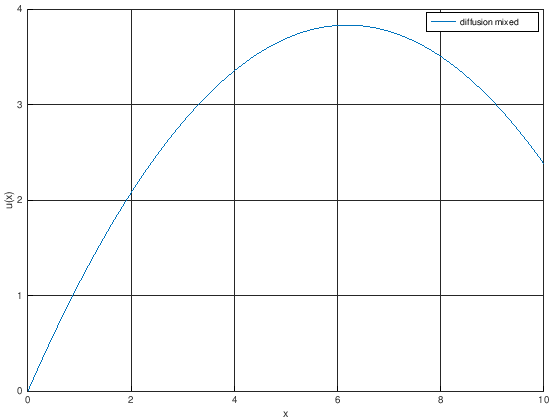

In [37]:
plot_solutions(points_items,solution_items,legend_items)

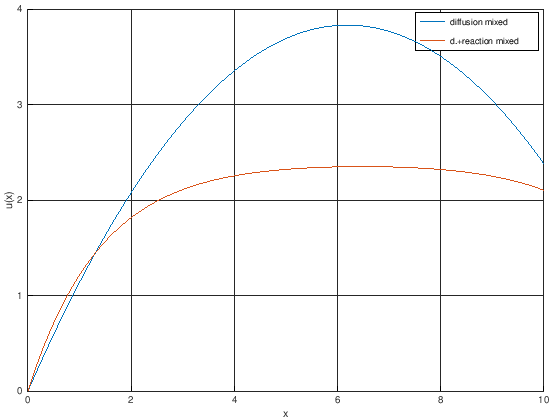

In [38]:
%% Diffusion with mixed boundary conditions + reaction
%   -k*u''(x)+k0*u(x)=g     in (0,L)
%                u(0)=U
%            -k*u'(L)=alfa*(u(L)-Uhat)
k0=0.5;
g=f+k0*Uhat;
% analytical solution:
K=sqrt(k0/k);
E1=exp(-K*L)*(k*K-alfa);
E2=exp(K*L)*(k*K+alfa);
tmp=(U-g/k0)*E2+alfa*g/k0-alfa*Uhat;
C1=tmp/(E1+E2);
C2=U-C1-g/k0;
u=@(x)C1*exp(-K*x)+C2*exp(K*x)+g/k0;

points_items{end+1}=x;
solution_items{end+1}=u;
legend_items{end+1}='d.+reaction mixed';    % append legend
plot_solutions(points_items,solution_items,legend_items)

## Numerical experiments
1. Check that for $k_0 \rightarrow 0$ the solution of the boundary value problem with reaction converges to the solution of the problem without reaction.